In [1]:
import glob
import pandas as pd
import pickle
import matplotlib.pyplot as pl
import numpy as np

from sklearn.metrics import roc_curve, auc

## Funções 

In [2]:
def remove_axis(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
def plot_hist(dataset_name, data, model_name, X_test_priv, X_test_priv_inv):
    model_path = glob.glob('models/{}_{}_{}.pkl'.format(dataset_name, model_name, data))[0]
    model = pickle.load(open(model_path, 'rb'))
    preds_priv = model.predict_proba(X_test_priv)[:,1]
    preds_priv_class = model.predict(X_test_priv)
    print('Total 0 unp: ', np.count_nonzero(preds_priv_class == 0))
    print('Total 1 unp: ', np.count_nonzero(preds_priv_class == 1))
    
    preds_priv_inv = model.predict_proba(X_test_priv_inv)[:,1]
    preds_priv_inv_class = model.predict(X_test_priv_inv)
    print('Total 0 unp inv: ', np.count_nonzero(preds_priv_inv_class == 0))
    print('Total 1 unp inv: ', np.count_nonzero(preds_priv_inv_class == 1))
    
    ax.hist(preds_priv, bins=50, color='darkred',
            label='Previsão renda > 2500 : {}'.format(np.count_nonzero(preds_priv_class == 1)))
    ax.hist(preds_priv_inv, bins=50, alpha=0.6, color='lightsalmon',
            label='Previsão renda > 2500: {}'.format(np.count_nonzero(preds_priv_inv_class == 1)))
    ax.legend(loc = 'upper right', frameon=False, title='Casos totais:')

    ax.set_xlabel(model2title[model_name])
    remove_axis(ax)

In [3]:
model2title = {'gb': 'Gradient Boosting',
               'rf': 'Random Forest',
               'lr': 'Regressão Logística',
               'svm': 'Support Vector Machine'}

## PNAD Genero

In [7]:
label = 'renda_bin'
protected_attribute = 'genero'
dataset_name = 'pnad_genero'
data = 'orig'

df_test = pd.read_csv('data/{}_test.csv'.format(dataset_name))
X_test_priv = df_test[df_test[protected_attribute]==1].drop(label, axis=1)
y_test_priv = df_test.loc[df_test[protected_attribute]==1, label].values
X_test_unpriv = df_test[df_test[protected_attribute]==0].drop(label, axis=1)
y_test_unpriv = df_test.loc[df_test[protected_attribute]==0, label].values

models_path = glob.glob('models/{}*_{}.pkl'.format(dataset_name, data))
df_test.head()

,genero,idade,anos_estudo,renda_bin,UF_11,UF_12,UF_13,UF_14,UF_15,UF_16,...,empreendimento_trabalho_12.0,ocupacao_trabalho_1.0,ocupacao_trabalho_2.0,ocupacao_trabalho_3.0,ocupacao_trabalho_4.0,ocupacao_trabalho_5.0,ocupacao_trabalho_6.0,ocupacao_trabalho_7.0,ocupacao_trabalho_8.0,ocupacao_trabalho_9.0
0,1.0,-1.066956,-1.003326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.310464,1.365107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,-0.684339,0.654577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.075697,-0.766483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.769604,-0.292797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Total 0 unp:  526
Total 1 unp:  72
Total 0 unp inv:  555
Total 1 unp inv:  43
Total 0 unp:  537
Total 1 unp:  61
Total 0 unp inv:  559
Total 1 unp inv:  39


Text(0.5,0.98,'Distribuição da probabilidade prevista para o grupo privilegiado (homens)')

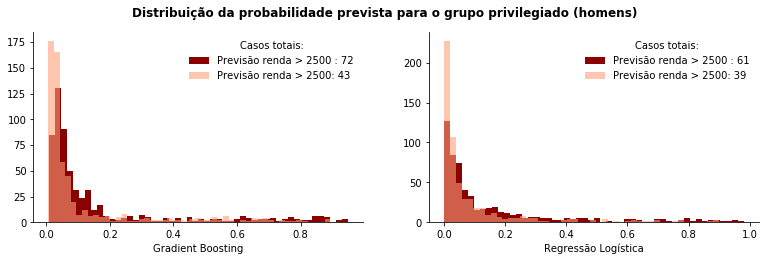

In [8]:
dataset_name = 'pnad_genero'
data = 'orig'
X_test_priv_inv = X_test_priv.copy()
X_test_priv_inv[protected_attribute] = 0

fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(13,3.5))
model_name = 'gb'
ax=axes[0]
plot_hist(dataset_name, data, model_name, X_test_priv, X_test_priv_inv)


model_name = 'lr'
ax=axes[1]
plot_hist(dataset_name, data, model_name, X_test_priv, X_test_priv_inv)
pl.suptitle("Distribuição da probabilidade prevista para o grupo privilegiado (homens)", fontsize=12, 
             fontweight='bold')
# fig.legend(['original', 'invertida'], title="Variável sensível:",
#            frameon=False, loc = 'upper left')
# pl.show()
# pl.savefig('analysis_image/hist_pnad_genero.png', bbox_inches='tight', transparent=True)

## PNAD raça

In [9]:
label = 'renda_bin'
protected_attribute = 'raca_bin'
dataset_name = 'pnad_raca'
data = 'orig'

df_test = pd.read_csv('data/{}_test.csv'.format(dataset_name))
X_test_priv = df_test[df_test[protected_attribute]==1].drop(label, axis=1)
y_test_priv = df_test.loc[df_test[protected_attribute]==1, label].values
X_test_unpriv = df_test[df_test[protected_attribute]==0].drop(label, axis=1)
y_test_unpriv = df_test.loc[df_test[protected_attribute]==0, label].values

models_path = glob.glob('models/{}*_{}.pkl'.format(dataset_name, data))

Total 0 unp:  374
Total 1 unp:  83
Total 0 unp inv:  398
Total 1 unp inv:  59
Total 0 unp:  375
Total 1 unp:  82
Total 0 unp inv:  402
Total 1 unp inv:  55


Text(0.5,0.98,'Distribuição da probabilidade prevista para o grupo privilegiado (branco e amarelo)')

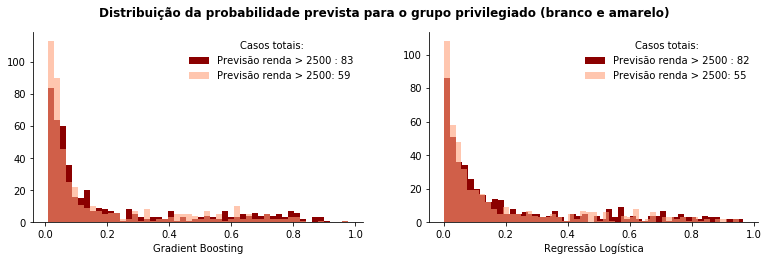

In [10]:
dataset_name = 'pnad_raca'
data = 'orig'
X_test_priv_inv = X_test_priv.copy()
X_test_priv_inv[protected_attribute] = 0

fig, axes = pl.subplots(nrows=1, ncols=2, figsize=(13,3.5))
model_name = 'gb'
ax=axes[0]
plot_hist(dataset_name, data, model_name, X_test_priv, X_test_priv_inv)
model_name = 'lr'
ax=axes[1]
plot_hist(dataset_name, data, model_name, X_test_priv, X_test_priv_inv)
pl.suptitle("Distribuição da probabilidade prevista para o grupo privilegiado (branco e amarelo)", fontsize=12, 
             fontweight='bold')
# fig.legend(['original', 'invertida'], title="Variável sensível:", 
#            frameon=False, loc = 'upper left')
# pl.show()
# pl.savefig('analysis_image/hist_pnad_raca.png', bbox_inches='tight', transparent=True)